In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


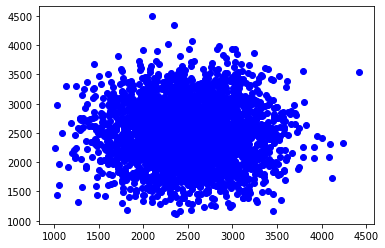

In [6]:
I = np.identity(2)
sd_dist1 = 500
cov_dist1 = I*(np.square(sd_dist1))
dist1 = np.random.multivariate_normal(mean=[2500,2500],cov=cov_dist1,size=3000)

plt.plot(dist1[:,0],dist1[:,1],'bo')

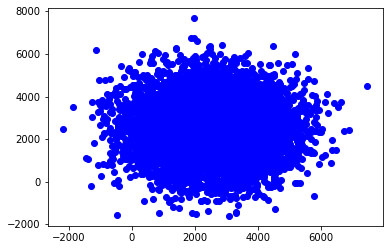

In [7]:
sd_dist2 = 1250
cov_dist2 = I*(np.square(sd_dist2))
dist2 = np.random.multivariate_normal(mean=[2500,2500],cov=cov_dist2,size=7000)

plt.plot(dist2[:,0],dist2[:,1],'bo')

In [8]:
df_dist1 = pd.DataFrame(dist1, columns = ['x','y'])

In [9]:
df_dist2 = pd.DataFrame(dist2, columns = ['x','y'])

In [13]:
df_dist1_filtered = df_dist1[(df_dist1['x']>=1500) & (df_dist1['x']<=3500) & (df_dist1['y']>=1500) & (df_dist1['y']<=3500)]
dist_df=df_dist1_filtered.iloc[:2000]